In [ ]:
# Create project structure
import os

folders = [
    "data",
    "data/videos",
    "outputs",
    "models",
    "utils"
]

for folder in folders:
    os.makedirs(folder, exist_ok=True)

print("Folder structure created")


Folder structure created


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

base_path = "/content/drive/MyDrive/Crowd_Analysis_Project"

folders = [
    base_path,
    f"{base_path}/data",
    f"{base_path}/data/videos",
    f"{base_path}/outputs"
]

for folder in folders:
    os.makedirs(folder, exist_ok=True)

print("Drive folder structure created")


Drive folder structure created


In [ ]:
import os

video_path = "/content/drive/MyDrive/Crowd_Analysis_Project/data/videos"
print(os.listdir(video_path))


['crowd.mp4']


In [3]:
!pip install ultralytics opencv-python-headless matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.4 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO

# Load lightweight YOLOv8 model
model = YOLO("yolov8n.pt")

print("✅ YOLOv8 model loaded successfully")


ModuleNotFoundError: No module named 'ultralytics'

In [ ]:
import cv2
from ultralytics import YOLO

# Load model (already downloaded)
model = YOLO("yolov8n.pt")

# Video path from Google Drive
video_path = "/content/drive/MyDrive/Crowd_Analysis_Project/data/videos/crowd.mp4"

# Read one frame
cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
cap.release()

if not ret:
    print("❌ Could not read video frame")
else:
    print("✅ Video frame read successfully")

    # Run YOLO on the frame
    results = model(frame)

    # Count persons (class id = 0)
    person_count = 0
    for r in results:
        for cls in r.boxes.cls:
            if int(cls) == 0:
                person_count += 1

    print("👥 People detected in first frame:", person_count)


✅ Video frame read successfully

0: 384x640 35 persons, 2 birds, 290.2ms
Speed: 25.6ms preprocess, 290.2ms inference, 53.1ms postprocess per image at shape (1, 3, 384, 640)
👥 People detected in first frame: 35



0: 384x640 35 persons, 2 birds, 102.8ms
Speed: 1.5ms preprocess, 102.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


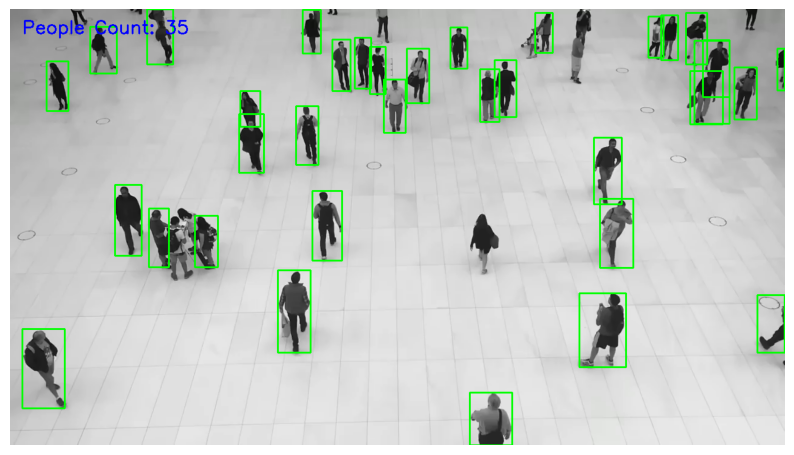

In [ ]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load model
model = YOLO("yolov8n.pt")

video_path = "/content/drive/MyDrive/Crowd_Analysis_Project/data/videos/crowd.mp4"

# Read one frame
cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
cap.release()

# Run YOLO
results = model(frame)

person_count = 0

# Draw bounding boxes
for r in results:
    boxes = r.boxes.xyxy.cpu().numpy()
    classes = r.boxes.cls.cpu().numpy()

    for box, cls in zip(boxes, classes):
        if int(cls) == 0:  # person class
            person_count += 1
            x1, y1, x2, y2 = map(int, box)
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Put count text
cv2.putText(
    frame,
    f"People Count: {person_count}",
    (20, 40),
    cv2.FONT_HERSHEY_SIMPLEX,
    1,
    (255, 0, 0),
    2
)

# Convert BGR to RGB for display
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Show image
plt.figure(figsize=(10, 6))
plt.imshow(frame_rgb)
plt.axis("off")
plt.show()



0: 384x640 35 persons, 2 birds, 101.6ms
Speed: 2.6ms preprocess, 101.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


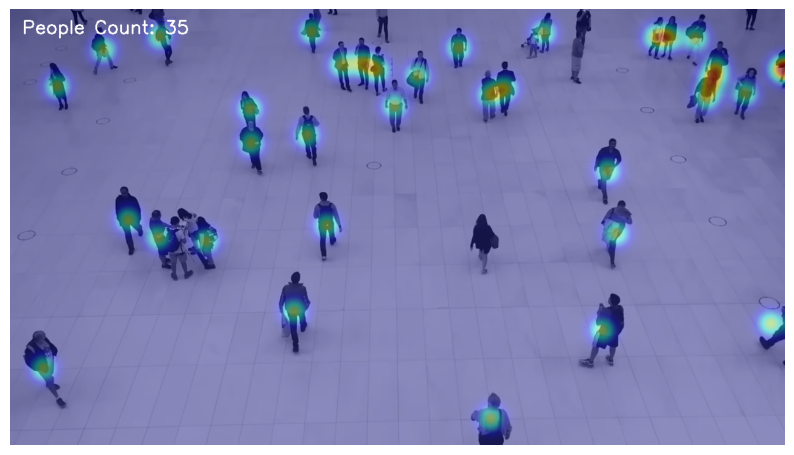

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load YOLO model
model = YOLO("yolov8n.pt")

video_path = "/content/drive/MyDrive/Crowd_Analysis_Project/data/videos/crowd.mp4"

# Read one frame
cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
cap.release()

# Run YOLO
results = model(frame)

h, w, _ = frame.shape
heatmap = np.zeros((h, w), dtype=np.float32)

person_count = 0

# Create heat points at person centers
for r in results:
    boxes = r.boxes.xyxy.cpu().numpy()
    classes = r.boxes.cls.cpu().numpy()

    for box, cls in zip(boxes, classes):
        if int(cls) == 0:  # person
            person_count += 1
            x1, y1, x2, y2 = map(int, box)
            cx = int((x1 + x2) / 2)
            cy = int((y1 + y2) / 2)
            heatmap[cy, cx] += 1

# Smooth heatmap
heatmap = cv2.GaussianBlur(heatmap, (0, 0), sigmaX=15, sigmaY=15)

# Normalize heatmap
heatmap = np.clip(heatmap / heatmap.max(), 0, 1)

# Convert to color heatmap
heatmap_color = cv2.applyColorMap(
    np.uint8(255 * heatmap),
    cv2.COLORMAP_JET
)

# Overlay heatmap on frame
overlay = cv2.addWeighted(frame, 0.6, heatmap_color, 0.4, 0)

# Add count text
cv2.putText(
    overlay,
    f"People Count: {person_count}",
    (20, 40),
    cv2.FONT_HERSHEY_SIMPLEX,
    1,
    (255, 255, 255),
    2
)

# Display result
overlay_rgb = cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 6))
plt.imshow(overlay_rgb)
plt.axis("off")
plt.show()



0: 384x640 35 persons, 2 birds, 102.2ms
Speed: 1.9ms preprocess, 102.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 34 persons, 1 bird, 103.5ms
Speed: 2.3ms preprocess, 103.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


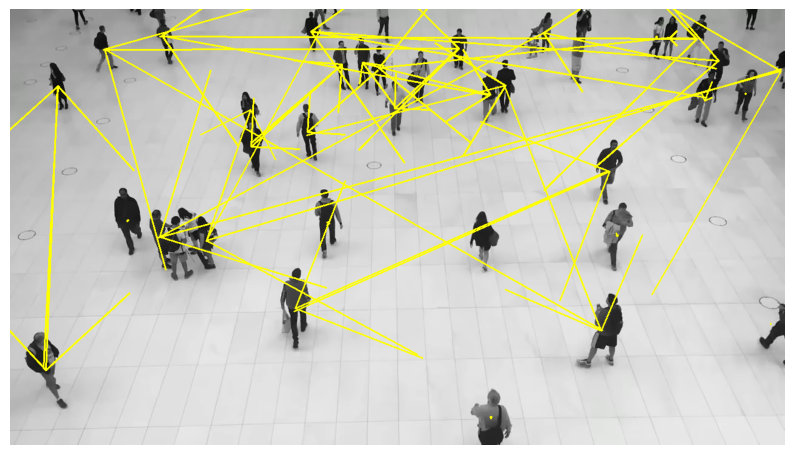

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load YOLO model
model = YOLO("yolov8n.pt")

video_path = "/content/drive/MyDrive/Crowd_Analysis_Project/data/videos/crowd.mp4"

cap = cv2.VideoCapture(video_path)

# Read two consecutive frames
ret1, frame1 = cap.read()
ret2, frame2 = cap.read()
cap.release()

if not ret1 or not ret2:
    print("❌ Could not read two frames")
else:
    # Run YOLO on both frames
    results1 = model(frame1)
    results2 = model(frame2)

    centers1 = []
    centers2 = []

    # Get centers from frame 1
    for r in results1:
        boxes = r.boxes.xyxy.cpu().numpy()
        classes = r.boxes.cls.cpu().numpy()
        for box, cls in zip(boxes, classes):
            if int(cls) == 0:
                x1, y1, x2, y2 = map(int, box)
                centers1.append(((x1 + x2) // 2, (y1 + y2) // 2))

    # Get centers from frame 2
    for r in results2:
        boxes = r.boxes.xyxy.cpu().numpy()
        classes = r.boxes.cls.cpu().numpy()
        for box, cls in zip(boxes, classes):
            if int(cls) == 0:
                x1, y1, x2, y2 = map(int, box)
                centers2.append(((x1 + x2) // 2, (y1 + y2) // 2))

    # Draw flow arrows
    flow_frame = frame2.copy()
    min_len = min(len(centers1), len(centers2))

    for i in range(min_len):
        cv2.arrowedLine(
            flow_frame,
            centers1[i],
            centers2[i],
            (0, 255, 255),
            2,
            tipLength=0.4
        )

    # Display
    flow_rgb = cv2.cvtColor(flow_frame, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 6))
    plt.imshow(flow_rgb)
    plt.axis("off")
    plt.show()


In [ ]:
video_path = "/content/drive/MyDrive/Crowd_Analysis_Project/data/videos/crowd.mp4"

import os
print("Video exists:", os.path.exists(video_path))


Video exists: True


In [19]:
import cv2
import numpy as np
from ultralytics import YOLO

# Load YOLO model
model = YOLO("yolov8n.pt")

# Input & output paths
# input_video = "/content/drive/MyDrive/Crowd_Analysis_Project/data/videos/test.mp4"
input_video = "/content/drive/MyDrive/Crowd_Analysis_Project/data/videos/test.mp4"

output_video = "/content/drive/MyDrive/Crowd_Analysis_Project/outputs/crowd_analysis_output_test.mp4"

cap = cv2.VideoCapture(input_video)

fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter(output_video, fourcc, fps, (width, height))

prev_centers = []

print("▶️ Processing video...")

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)

    heatmap = np.zeros((height, width), dtype=np.float32)
    centers = []
    person_count = 0

    for r in results:
        boxes = r.boxes.xyxy.cpu().numpy()
        classes = r.boxes.cls.cpu().numpy()

        for box, cls in zip(boxes, classes):
            if int(cls) == 0:  # person
                person_count += 1
                x1, y1, x2, y2 = map(int, box)

                # Bounding box
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

                # Center
                cx = (x1 + x2) // 2
                cy = (y1 + y2) // 2
                centers.append((cx, cy))
                heatmap[cy, cx] += 1

    # Draw flow arrows
    for i in range(min(len(prev_centers), len(centers))):
        cv2.arrowedLine(
            frame,
            prev_centers[i],
            centers[i],
            (0, 255, 255),
            2,
            tipLength=0.4
        )

    prev_centers = centers.copy()

    # Density heatmap
    heatmap = cv2.GaussianBlur(heatmap, (0, 0), 15)
    if heatmap.max() > 0:
        heatmap = heatmap / heatmap.max()

    heatmap_color = cv2.applyColorMap(
        np.uint8(255 * heatmap),
        cv2.COLORMAP_JET
    )

    frame = cv2.addWeighted(frame, 0.6, heatmap_color, 0.4, 0)

    # Count text
    cv2.putText(
        frame,
        f"People Count: {person_count}",
        (20, 40),
        cv2.FONT_HERSHEY_SIMPLEX,
        1,
        (255, 255, 255),
        2
    )

    out.write(frame)

cap.release()
out.release()

print("✅ Video processing complete. Output saved to Drive.")


▶️ Processing video...

0: 384x640 15 persons, 125.7ms
Speed: 5.5ms preprocess, 125.7ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 102.4ms
Speed: 1.2ms preprocess, 102.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 persons, 98.5ms
Speed: 1.5ms preprocess, 98.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 96.9ms
Speed: 1.5ms preprocess, 96.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 97.2ms
Speed: 1.4ms preprocess, 97.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 101.0ms
Speed: 1.5ms preprocess, 101.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 persons, 111.7ms
Speed: 1.8ms preprocess, 111.7ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 116.8ms
Speed: 1.6ms preprocess, 116.8ms inferenc

In [18]:
import os

video_dir = "/content/drive/MyDrive/Crowd_Analysis_Project/data/videos"
print(os.listdir(video_dir))


['crowd.mp4', 'crowd_test2.mp4', 'test.mp4']


In [20]:
def compute_optical_flow(prev_gray, curr_gray):
    """
    Compute dense optical flow between two grayscale frames.
    """
    flow = cv2.calcOpticalFlowFarneback(
        prev_gray, curr_gray,
        None,
        pyr_scale=0.5,
        levels=3,
        winsize=15,
        iterations=3,
        poly_n=5,
        poly_sigma=1.2,
        flags=0
    )
    return flow


In [21]:
def mask_flow_with_people(flow, boxes, frame_shape):
    """
    Keep optical flow only in regions where people are detected.
    """
    mask = np.zeros((frame_shape[0], frame_shape[1]), dtype=np.uint8)

    for (x1, y1, x2, y2) in boxes:
        mask[y1:y2, x1:x2] = 1

    flow_x = flow[..., 0] * mask
    flow_y = flow[..., 1] * mask

    return flow_x, flow_y


In [22]:
def compute_region_flow(flow_x, flow_y, grid_size=40, min_magnitude=1.0):
    """
    Compute average flow vector per region.
    """
    h, w = flow_x.shape
    region_flows = []

    for y in range(0, h, grid_size):
        for x in range(0, w, grid_size):
            fx = flow_x[y:y+grid_size, x:x+grid_size]
            fy = flow_y[y:y+grid_size, x:x+grid_size]

            if fx.size == 0 or fy.size == 0:
                continue

            avg_fx = np.mean(fx)
            avg_fy = np.mean(fy)

            magnitude = np.sqrt(avg_fx**2 + avg_fy**2)

            if magnitude > min_magnitude:
                region_flows.append((x + grid_size//2,
                                      y + grid_size//2,
                                      avg_fx,
                                      avg_fy))

    return region_flows


In [25]:
def detect_people(frame, model):
    """
    Detect people in a frame using YOLO.
    Returns:
        boxes   : list of bounding boxes (x1, y1, x2, y2)
        centers : list of center points (cx, cy)
    """
    results = model(frame)
    boxes = []
    centers = []

    for r in results:
        bxs = r.boxes.xyxy.cpu().numpy()
        clss = r.boxes.cls.cpu().numpy()

        for box, cls in zip(bxs, clss):
            if int(cls) == 0:  # class 0 = person
                x1, y1, x2, y2 = map(int, box)
                boxes.append((x1, y1, x2, y2))
                centers.append(((x1 + x2) // 2, (y1 + y2) // 2))

    return boxes, centers



0: 384x640 34 persons, 1 bird, 105.7ms
Speed: 2.1ms preprocess, 105.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


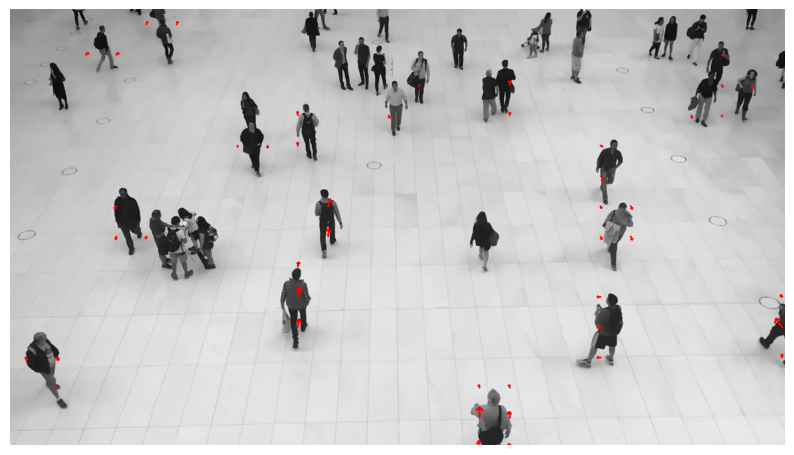

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Video path
video_path = "/content/drive/MyDrive/Crowd_Analysis_Project/data/videos/crowd.mp4"

cap = cv2.VideoCapture(video_path)

# Read first frame
ret, prev_frame = cap.read()
if not ret:
    raise RuntimeError("Could not read video")

prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)

# Read next frame
ret, curr_frame = cap.read()
cap.release()

curr_gray = cv2.cvtColor(curr_frame, cv2.COLOR_BGR2GRAY)

# --- YOLO detection (people) ---
boxes, centers = detect_people(curr_frame, model)

# --- Optical flow ---
flow = compute_optical_flow(prev_gray, curr_gray)

# --- Mask flow using people regions ---
flow_x, flow_y = mask_flow_with_people(flow, boxes, curr_frame.shape)

# --- Compute region-wise flow ---
region_flows = compute_region_flow(flow_x, flow_y, grid_size=50)

# --- Draw arrows ---
output = curr_frame.copy()
for (x, y, fx, fy) in region_flows:
    cv2.arrowedLine(
        output,
        (x, y),
        (int(x + fx*3), int(y + fy*3)),
        (0, 0, 255),
        2,
        tipLength=0.4
    )

# Display
output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 6))
plt.imshow(output_rgb)
plt.axis("off")
plt.show()


In [4]:
import cv2
import numpy as np
from ultralytics import YOLO

# -------- CONFIG --------
input_video = "/content/drive/MyDrive/Crowd_Analysis_Project/data/videos/crowd.mp4"
output_video = "/content/drive/MyDrive/Crowd_Analysis_Project/outputs/crowd_analysis_final.mp4"
grid_size = 50
min_magnitude = 0.3
# ------------------------

# Load model
model = YOLO("yolov8n.pt")

cap = cv2.VideoCapture(input_video)
fps = int(cap.get(cv2.CAP_PROP_FPS))
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

out = cv2.VideoWriter(
    output_video,
    cv2.VideoWriter_fourcc(*"mp4v"),
    fps,
    (w, h)
)

ret, prev_frame = cap.read()
prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # ---- YOLO People Detection ----
    results = model(frame)
    boxes = []
    centers = []

    for r in results:
        for box, cls in zip(r.boxes.xyxy.cpu().numpy(),
                            r.boxes.cls.cpu().numpy()):
            if int(cls) == 0:
                x1, y1, x2, y2 = map(int, box)
                boxes.append((x1, y1, x2, y2))
                centers.append(((x1+x2)//2, (y1+y2)//2))
                cv2.rectangle(frame, (x1,y1), (x2,y2), (0,255,0), 2)

    # ---- Optical Flow ----
    flow = cv2.calcOpticalFlowFarneback(
        prev_gray, gray,
        None, 0.5, 3, 15, 3, 5, 1.2, 0
    )

    mask = np.zeros((h, w), dtype=np.uint8)
    for (x1,y1,x2,y2) in boxes:
        mask[y1:y2, x1:x2] = 1

    flow_x = flow[...,0] * mask
    flow_y = flow[...,1] * mask

    # ---- Region-wise Flow ----
    for y in range(0, h, grid_size):
        for x in range(0, w, grid_size):
            fx = flow_x[y:y+grid_size, x:x+grid_size]
            fy = flow_y[y:y+grid_size, x:x+grid_size]
            if fx.size == 0:
                continue

            avg_fx = np.mean(fx)
            avg_fy = np.mean(fy)
            mag = np.sqrt(avg_fx**2 + avg_fy**2)

            if mag > min_magnitude:
                cx = x + grid_size//2
                cy = y + grid_size//2
                cv2.arrowedLine(
                    frame,
                    (cx, cy),
                    (int(cx+avg_fx*3), int(cy+avg_fy*3)),
                    (0,0,255),
                    2,
                    tipLength=0.4
                )

    # ---- Count ----
    cv2.putText(
        frame,
        f"People Count: {len(centers)}",
        (20,40),
        cv2.FONT_HERSHEY_SIMPLEX,
        1,
        (255,255,255),
        2
    )

    out.write(frame)
    prev_gray = gray.copy()

cap.release()
out.release()

print("✅ FINAL VIDEO SAVED:", output_video)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

0: 384x640 34 persons, 1 bird, 353.3ms
Speed: 11.8ms preprocess, 353.3ms inference, 43.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 34 persons, 2 birds, 170.4ms
Speed: 4.0ms preprocess, 170.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 36 persons, 2 birds, 123.4ms
Speed: 2.8ms preprocess, 123.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 36 persons, 2 birds, 134.2ms
Speed: 2.5ms preprocess, 134.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 37 persons, 2 birds, 121.7ms
Speed: 3.0ms preprocess, 121.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384